# TO DO:
- try longer train, so lh from distributions is close to lh of the mean
- compare with fixed R
- ML research with `hrg_likelihood_T0`

In [1]:
import sys
sys.path.append('../src/')
from vi_hrg import *
from utils import *
from torch import autograd
torch.manual_seed(82)

In [2]:
def noise_r(x, R, rel_var=0.1, epsilon=1e-4):
    rs = torch.distributions.normal.Normal(x, R*rel_var).sample() 
    return torch.clamp(rs, min=0+epsilon, max=R-epsilon)

In [3]:
def noise_phi(x, rel_var=0.1):
    phis = torch.distributions.normal.Normal(x, 2*np.pi*rel_var).sample()
    return phis % (2*np.pi)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


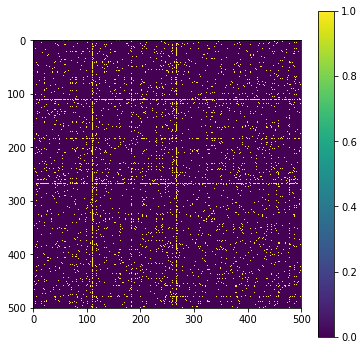

In [4]:
N = 500
R = 8.0
alpha = 0.8
T = 0

G = HRG(R=R, alpha=alpha, T=T)
r, theta, A = G.generate(N)
G.show()
#G.plot()

In [5]:
A.sum().item()/N**2

0.052256

# Free R

In [6]:

r_zzz = noise_r(r, R, rel_var=0.1)
phi_zzz = noise_phi(theta, 0.1)

r_loc_init = logit(r/R)
r_scale_init = (torch.ones([N])/8).log()
phi_loc_init = polar2cart(1, theta)
phi_scale_init = (torch.ones([N])*100).log()
R_conc_init = torch.tensor(10.).log()
R_scale_init = torch.tensor(1.).log()
alpha_conc_init = torch.tensor(.5).log()
alpha_scale_init = torch.tensor(.5).log()
T_init = torch.tensor([3.,10.]).log()
dataloader = DataLoader(EdgesDataset(A, directed=False, diagonal=False), 
                        batch_size=int(N*16), num_workers=0, shuffle=True)
vi = VI_HRG(N,20, init_values={'rs_loc':r_loc_init,
                                'rs_scale':r_scale_init,
                              'phis_loc':phi_loc_init,
                              'phis_scale':phi_scale_init, 
                              'R_conc':R_conc_init, 
                              'R_scale':R_scale_init,
                              'alpha_conc':alpha_conc_init,
                              'alpha_scale':alpha_scale_init,
                              'T':T_init},
           fixed={'R':None, 
                  'T':0.1,
                  'alpha':0.75},
           priors={'R_p':torch.tensor([20., 0.4]), 
                    'T_p':torch.tensor([1., 15.]),
                    'alpha_p':torch.tensor([27., 0.03])},)

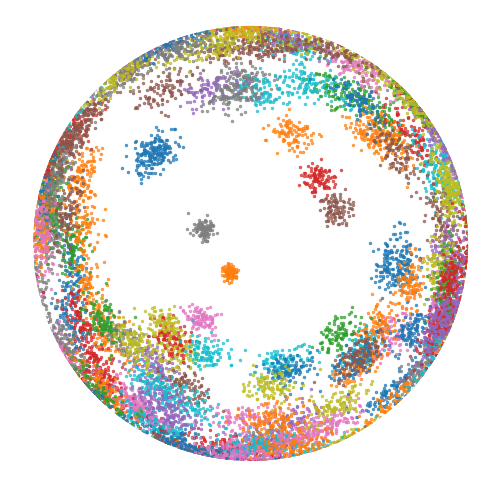

In [7]:
nodes = vi.posterior_samples(100)
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')
for i in range(N):
    ax.scatter(nodes[:,i,1].numpy(), nodes[:,i,0].numpy(), alpha=0.7, s=6)
#ax.scatter(theta.numpy(), r.numpy(), alpha=0.7, s=6, color='black')
#for link in A.nonzero():
#    ax.plot(theta[link].numpy(), r[link].numpy(), color='gray', alpha=0.2)
ax.set_rmax(R*1.02)
ax.set_rticks([]) 
ax.set_axis_off()
plt.show()
#print('Likelihood:', vi.likelihood())

In [8]:
vi.train(dataloader, lrs=[0.1, 0.05, 0.01], debug=False, epochs=[60,60,120])

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 56984.02 | Epoch time 4.03
Epoch 2 | LR: 0.10 | Total loss: 52697.13 | Epoch time 3.91
Epoch 3 | LR: 0.10 | Total loss: 51026.82 | Epoch time 4.06
Epoch 4 | LR: 0.10 | Total loss: 47213.43 | Epoch time 4.03
Epoch 5 | LR: 0.10 | Total loss: 45241.33 | Epoch time 3.73
Epoch 6 | LR: 0.10 | Total loss: 42847.56 | Epoch time 3.82
Epoch 7 | LR: 0.10 | Total loss: 41281.04 | Epoch time 3.57
Epoch 8 | LR: 0.10 | Total loss: 40452.63 | Epoch time 3.64
Epoch 9 | LR: 0.10 | Total loss: 39717.59 | Epoch time 4.09
Epoch 10 | LR: 0.10 | Total loss: 37570.08 | Epoch time 3.39
Epoch 11 | LR: 0.10 | Total loss: 36140.31 | Epoch time 4.18
Epoch 12 | LR: 0.10 | Total loss: 35485.31 | Epoch time 3.59
Epoch 13 | LR: 0.10 | Total loss: 34279.36 | Epoch time 4.39
Epoch 14 | LR: 0.10 | Total loss: 33056.51 | Epoch time 4.72
Epoch 15 | LR: 0.10 | Total loss: 33170.22 | Epoch time 4.06
Epoch 16 | LR: 0.10 | Total loss: 31939.72 | Epoch time 3.94
Ep

 ../src/utils.py:126: UserWarning:edes_prob_arg has NaN in it! 


Epoch 56 | LR: 0.10 | Total loss: 16158.94 | Epoch time 4.69
Epoch 57 | LR: 0.10 | Total loss: 16318.82 | Epoch time 3.57
Epoch 58 | LR: 0.10 | Total loss: 16028.31 | Epoch time 3.35
Epoch 59 | LR: 0.10 | Total loss: 15698.52 | Epoch time 4.61
Epoch 60 | LR: 0.10 | Total loss: 15335.00 | Epoch time 3.41
Epoch 61 | LR: 0.05 | Total loss: 14773.98 | Epoch time 3.34
Epoch 62 | LR: 0.05 | Total loss: 14705.64 | Epoch time 4.65
Epoch 63 | LR: 0.05 | Total loss: 14752.05 | Epoch time 4.71
Epoch 64 | LR: 0.05 | Total loss: 14753.72 | Epoch time 3.72
Epoch 65 | LR: 0.05 | Total loss: 14357.10 | Epoch time 4.36
Epoch 66 | LR: 0.05 | Total loss: 13919.08 | Epoch time 4.29
Epoch 67 | LR: 0.05 | Total loss: 14029.32 | Epoch time 3.52
Epoch 68 | LR: 0.05 | Total loss: 13691.30 | Epoch time 3.53
Epoch 69 | LR: 0.05 | Total loss: 13614.20 | Epoch time 4.69
Epoch 70 | LR: 0.05 | Total loss: 12488.36 | Epoch time 4.59
Epoch 71 | LR: 0.05 | Total loss: 12993.39 | Epoch time 4.41
Epoch 72 | LR: 0.05 | To

Epoch 191 | LR: 0.01 | Total loss: 4057.95 | Epoch time 4.23
Epoch 192 | LR: 0.01 | Total loss: 4245.50 | Epoch time 4.17
Epoch 193 | LR: 0.01 | Total loss: 4203.97 | Epoch time 4.50
Epoch 194 | LR: 0.01 | Total loss: 4113.87 | Epoch time 4.48
Epoch 195 | LR: 0.01 | Total loss: 4123.45 | Epoch time 4.58
Epoch 196 | LR: 0.01 | Total loss: 4023.10 | Epoch time 4.43
Epoch 197 | LR: 0.01 | Total loss: 4117.51 | Epoch time 3.41
Epoch 198 | LR: 0.01 | Total loss: 4254.03 | Epoch time 4.74
Epoch 199 | LR: 0.01 | Total loss: 4388.40 | Epoch time 4.31
Epoch 200 | LR: 0.01 | Total loss: 4053.32 | Epoch time 3.37
Epoch 201 | LR: 0.01 | Total loss: 4263.70 | Epoch time 4.01
Epoch 202 | LR: 0.01 | Total loss: 4028.74 | Epoch time 4.63
Epoch 203 | LR: 0.01 | Total loss: 4004.02 | Epoch time 4.63
Epoch 204 | LR: 0.01 | Total loss: 3965.96 | Epoch time 4.74
Epoch 205 | LR: 0.01 | Total loss: 3876.38 | Epoch time 4.56
Epoch 206 | LR: 0.01 | Total loss: 3912.52 | Epoch time 4.19
Epoch 207 | LR: 0.01 | T

In [25]:
vi.likelihood(debug=False)

-2499.614285088551

In [26]:
def hrg_likelihood_T0(A, r, phi_polar, R, T, alpha, debug=False):
    eps = -1e+10
    n = len(r)
    edges = torch.where(A>0, 
                            torch.ones(A.size()), 
                            torch.zeros(A.size()))
    l1e_a_ri = log1mexp(alpha*r*2)
    #print(l1e_a_ri.sum())
    l1e_a_R = log1mexp(alpha*R)
   # print(l1e_a_R)
    a_R_ri = alpha * (r-R)
    #print(a_R_ri.sum())
    r_matrix = r.expand(n,n)
    phi_matrix = phi_polar.expand(n,n)
    hd = hyperdist(r_matrix, r_matrix.t(), phi_matrix, phi_matrix.t())
    if T==0:
        threshold = torch.where(hd<R,
                                torch.zeros(hd.size()),
                                torch.ones(hd.size())*eps)
        threshold_ = torch.where(hd<R,
                                torch.ones(hd.size())*eps,
                                torch.zeros(hd.size()))
        
        #threshold = torch.clamp(((cd*2).log()<R).float(), min=1e-2)
        #print(threshold)
        lp = torch.where(edges==1,
                        threshold,
                        threshold_)
        #lp = edges*(threshold.log()) + (1-edges)*(1-threshold).log()
    else:
        l1pe = (hd-R)/(2*T)
        lp = edges*(-log1pexp(l1pe)) + (1-edges)*(log1pexp_(l1pe))
    lp = lp.triu(diagonal=1)
    #print(lp)
    if debug: print('Prob edges >>', lp.sum().item())
    if debug: print('a_R_ri  >>', (a_R_ri+l1e_a_ri).sum().item())
    if debug: print('Alpha       >>', alpha.log().item())
    if debug: print('l1e_a_R     >>', 2*l1e_a_R.item())
    out = lp.sum() + (a_R_ri+l1e_a_ri).sum() + alpha.log() \
        - torch.tensor(np.pi*2).log() - 2*l1e_a_R
    return lp

In [27]:
# Original values, T=0
hrg_likelihood_T0(A, r, theta, torch.tensor(R), torch.tensor(0.), torch.tensor(alpha), debug=True).sum()

Prob edges >> 0.0
a_R_ri  >> -439.50470501739073
Alpha       >> -0.2231435328722
l1e_a_R     >> -0.0033258781768381596


tensor(0.)

In [28]:
# Original values except T=0.1
hrg_likelihood_T0(A, r, theta, torch.tensor(R), torch.tensor(0.1), torch.tensor(alpha), debug=True).sum()

Prob edges >> -1128.5018663019835
a_R_ri  >> -439.50470501739073
Alpha       >> -0.2231435328722
l1e_a_R     >> -0.0033258781768381596


tensor(-1128.5019, dtype=torch.float64)

In [29]:
r_, phi_, R_, T_, alpha_ = vi.qmean()
R_, T_, alpha_

(tensor(8.1826, dtype=torch.float64),
 tensor(0.1000, dtype=torch.float64),
 tensor(0.7500, dtype=torch.float64))

In [30]:
# Estimated values
lp = hrg_likelihood_T0(A, r_, c2d(phi_), R_, T_ , alpha_, debug=True)

Prob edges >> -1518.6717987252941
a_R_ri  >> -436.1291820681388
Alpha       >> -0.2876820724517809
l1e_a_R     >> -0.00432755147854887


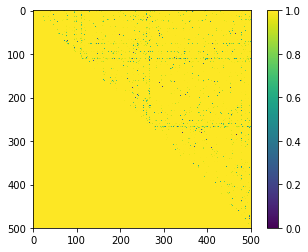

In [31]:
np.set_printoptions(precision=2)
plt.imshow(lp.exp())
plt.colorbar()
plt.show()

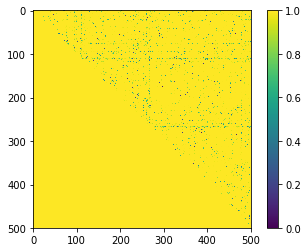

In [32]:
A_lh = vi.get_A_lh(dataloader)
plt.imshow(A_lh.exp())
plt.colorbar()
plt.show()

In [33]:
A_lh.sum()

tensor(-2350.6103, dtype=torch.float64)

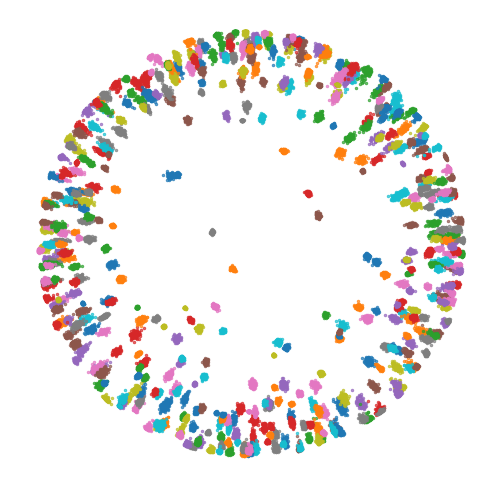

Likelihood: -2560.2013076980406


In [34]:
nodes = vi.posterior_samples(100)
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')
for i in range(N):
    ax.scatter(nodes[:,i,1].numpy(), nodes[:,i,0].numpy(), alpha=0.7, s=6)
#ax.scatter(theta.numpy(), r.numpy(), alpha=0.7, s=6, color='black')
#for link in A.nonzero():
#    ax.plot(theta[link].numpy(), r[link].numpy(), color='gray', alpha=0.2)
ax.set_rmax(R_*1.02)
ax.set_rticks([]) 
ax.set_axis_off()
plt.show()
print('Likelihood:', vi.likelihood())

In [35]:
hrg_likelihood_T0(A, r, theta, torch.tensor(R), torch.tensor(0.001), torch.tensor(alpha), debug=True).sum()

Prob edges >> -10.100857272950211
a_R_ri  >> -439.50470501739073
Alpha       >> -0.2231435328722
l1e_a_R     >> -0.0033258781768381596


tensor(-10.1009, dtype=torch.float64)

In [36]:
hrg_likelihood_T0(A, r, theta, torch.tensor(R), torch.tensor(0.0001), torch.tensor(alpha), debug=False).sum()

tensor(-0.8607, dtype=torch.float64)

# Fixed R

In [39]:
vi_fix = VI_HRG(N,20, init_values={'rs_loc':r_loc_init,
                                'rs_scale':r_scale_init,
                              'phis_loc':phi_loc_init,
                              'phis_scale':phi_scale_init, 
                              'R_conc':R_conc_init, 
                              'R_scale':R_scale_init,
                              'alpha_conc':alpha_conc_init,
                              'alpha_scale':alpha_scale_init,
                              'T':T_init},
           fixed={'R':8.0, 
                  'T':0.1,
                  'alpha':0.75},
           priors={'R_p':torch.tensor([20., 0.4]), 
                    'T_p':torch.tensor([1., 15.]),
                    'alpha_p':torch.tensor([27., 0.03])},)

In [40]:
vi_fix.train(dataloader, lrs=[0.1, 0.05, 0.01], debug=False, epochs=[60,60,120])

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 35303.98 | Epoch time 4.80
Epoch 2 | LR: 0.10 | Total loss: 30082.97 | Epoch time 4.31
Epoch 3 | LR: 0.10 | Total loss: 27390.26 | Epoch time 4.82
Epoch 4 | LR: 0.10 | Total loss: 25798.06 | Epoch time 4.33
Epoch 5 | LR: 0.10 | Total loss: 24246.80 | Epoch time 3.99
Epoch 6 | LR: 0.10 | Total loss: 23095.14 | Epoch time 4.51
Epoch 7 | LR: 0.10 | Total loss: 22534.77 | Epoch time 4.82
Epoch 8 | LR: 0.10 | Total loss: 21107.01 | Epoch time 4.94
Epoch 9 | LR: 0.10 | Total loss: 20539.95 | Epoch time 5.14
Epoch 10 | LR: 0.10 | Total loss: 19623.36 | Epoch time 4.35
Epoch 11 | LR: 0.10 | Total loss: 19564.25 | Epoch time 4.47
Epoch 12 | LR: 0.10 | Total loss: 18893.71 | Epoch time 4.57
Epoch 13 | LR: 0.10 | Total loss: 18137.71 | Epoch time 5.10
Epoch 14 | LR: 0.10 | Total loss: 17890.30 | Epoch time 5.17
Epoch 15 | LR: 0.10 | Total loss: 17247.10 | Epoch time 5.63
Epoch 16 | LR: 0.10 | Total loss: 16907.48 | Epoch time 4.58
Ep

Epoch 136 | LR: 0.01 | Total loss: 3311.22 | Epoch time 4.27
Epoch 137 | LR: 0.01 | Total loss: 3414.16 | Epoch time 4.35
Epoch 138 | LR: 0.01 | Total loss: 3325.56 | Epoch time 4.75
Epoch 139 | LR: 0.01 | Total loss: 3227.87 | Epoch time 4.98
Epoch 140 | LR: 0.01 | Total loss: 3221.37 | Epoch time 4.17
Epoch 141 | LR: 0.01 | Total loss: 3168.75 | Epoch time 4.80
Epoch 142 | LR: 0.01 | Total loss: 3152.81 | Epoch time 3.65
Epoch 143 | LR: 0.01 | Total loss: 3200.40 | Epoch time 4.71
Epoch 144 | LR: 0.01 | Total loss: 3177.65 | Epoch time 4.16
Epoch 145 | LR: 0.01 | Total loss: 3166.56 | Epoch time 4.47
Epoch 146 | LR: 0.01 | Total loss: 3177.10 | Epoch time 4.39
Epoch 147 | LR: 0.01 | Total loss: 3165.38 | Epoch time 4.17
Epoch 148 | LR: 0.01 | Total loss: 3169.82 | Epoch time 4.42
Epoch 149 | LR: 0.01 | Total loss: 3326.30 | Epoch time 4.50
Epoch 150 | LR: 0.01 | Total loss: 3326.12 | Epoch time 4.02
Epoch 151 | LR: 0.01 | Total loss: 3374.96 | Epoch time 3.69
Epoch 152 | LR: 0.01 | T

In [41]:
r_, phi_, R_, T_, alpha_ = vi_fix.qmean()
R_, T_, alpha_

(tensor(8., dtype=torch.float64),
 tensor(0.1000, dtype=torch.float64),
 tensor(0.7500, dtype=torch.float64))

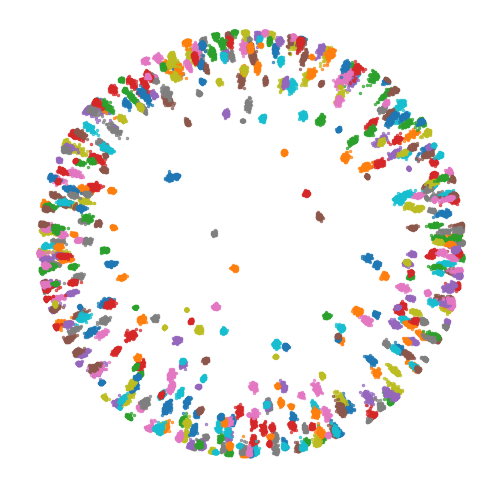

Likelihood: -1875.4682930637684


In [42]:
nodes = vi_fix.posterior_samples(100)
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')
for i in range(N):
    ax.scatter(nodes[:,i,1].numpy(), nodes[:,i,0].numpy(), alpha=0.7, s=6)
#ax.scatter(theta.numpy(), r.numpy(), alpha=0.7, s=6, color='black')
#for link in A.nonzero():
#    ax.plot(theta[link].numpy(), r[link].numpy(), color='gray', alpha=0.2)
ax.set_rmax(R_*1.02)
ax.set_rticks([]) 
ax.set_axis_off()
plt.show()
print('Likelihood:', vi_fix.likelihood())